# FISH - Data interpretation - A Python interactive notebook to interpret FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.

```

## Importing libraries

In [1]:
import sys
import matplotlib.pyplot as plt 
from  matplotlib.ticker import FuncFormatter
import numpy as np 
import pandas as pd
import pathlib
import warnings
import glob
import seaborn as sns
import zipfile
import shutil
import scipy.stats as stats
import os
warnings.filterwarnings("ignore")

## Defining paths

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa
# Local folder path
local_folder_path = pathlib.Path().absolute().joinpath('temp_zip_analyses')
local_folder_path
# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
# Connection to munsky-nas
path_to_config_file = desktop_path.joinpath('config.yml')
share_name = 'share'

# creating a folder to store all plots
destination_folder = pathlib.Path().absolute().joinpath('results', 'data_Huy_combinations')
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder) 

In [3]:
psf_z=350                # Theoretical size of the PSF emitted by a [rna] spot in the z plan, in nanometers
psf_yx=160               # Theoretical size of the PSF emitted by a [rna] spot in the yx plan, in nanometers
voxel_size_z=500         # Microscope conversion px to nanometers in the z axis.
voxel_size_yx=160        # Microscope conversion px to nanometers in the xy axis.
scale = np.array ([ voxel_size_z/psf_z, voxel_size_yx/psf_yx, voxel_size_yx/psf_yx ])

list_timepoints = [0,18,300]
list_thresholds_intensity =[400,450,500,550]
ts_distance =2

## List of folders to process

In [4]:
def Huy_data(mandatory_substring):
    list_dirs=(
    'smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_woStim',
    'smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_18minTPL_5uM' ,
    'smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_5hTPL_5uM' )
    list_labels = [ 'woSTM','18minTPL_5uM','5hTPL_5uM']
    plot_title_suffix= "MS2_CY5"
    mandatory_substring = mandatory_substring      #'nuc_70__cyto_0__psfz_350__psfyx_160__ts_400_400'
    return list_dirs, list_labels, plot_title_suffix, mandatory_substring

In [25]:
import numpy as np

#test = np.array( ([0,0,0],[0,0,0], [0,0,1], [0,0,1]  ))
#print(test)
#inv_test = ~test + 2
#print(inv_test)
#print(np.all(inv_test,axis =0))
#print(np.all(inv_test,axis =1))


[[0 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]]
[[1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 0]]
[ True  True False]
[ True  True False False]


----

# Running the codes

----

In [5]:
substring_to_iterate = 'nuc_70__cyto_0__psfz_350__psfyx_160__ts_'

## Connecting to NAS and extracting data

In [6]:
list_df_paths=[]
list_df_names=[]
counter_dataframes =0
plot_title_suffix= "MS2_CY5"
for k, int_0 in enumerate(list_thresholds_intensity):
    for j, int_1 in enumerate(list_thresholds_intensity):
        # Iterating for each time point (experimental condition)
        for i,tp in enumerate (list_timepoints):
            df_name = plot_title_suffix+'_time_'+str(tp)+ '_int_'+str(int_0)+ '_'+str(int_1)+ '_dist_'+str(ts_distance)
            df_path=pathlib.Path().absolute().joinpath(destination_folder,df_name +'.csv')
            list_df_paths.append(df_path)
            list_df_names.append(df_name)
            counter_dataframes+=1
# Loading all dataframes in a dictionary
dic_dataframes = {}
for df_index, df_name in enumerate (list_df_names):
    dic_dataframes[df_name] = pd.read_csv(list_df_paths[df_index])

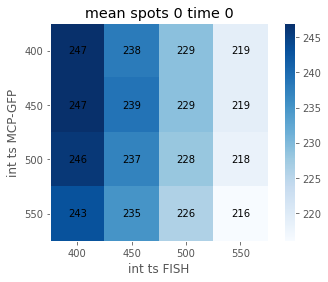

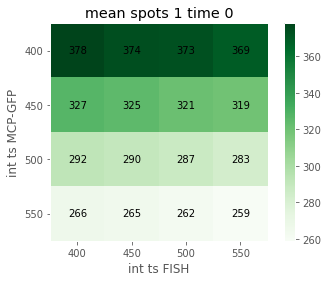

In [10]:
matrix_spots_0_time_0 = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )
matrix_spots_1_time_0 = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )

matrix_test = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )
for k, int_0 in enumerate(list_thresholds_intensity): # rows
    for j, int_1 in enumerate(list_thresholds_intensity): # columns
                
        df_name_loop = plot_title_suffix+'_time_'+str(0)+ '_int_'+str(int_0)+ '_'+str(int_1)+ '_dist_'+str(ts_distance)
        matrix_spots_0_time_0[k, j] = np.round( dic_dataframes[df_name_loop]['num_0'].values.mean(), 0)
        matrix_spots_1_time_0[k, j] = np.round( dic_dataframes[df_name_loop]['num_1'].values.mean(), 0)
        
fig, ax = plt.subplots(1,1)
img = ax.imshow(matrix_spots_0_time_0,cmap='Blues')
for (j,i),label in np.ndenumerate(matrix_spots_0_time_0.astype('int')):
    ax.text(i,j,label,ha='center',va='center')
ax.set_yticks([0,1,2,3])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list_thresholds_intensity)
ax.set_yticklabels(list_thresholds_intensity)
ax.set_xlabel('int ts FISH')
ax.set_ylabel('int ts MCP-GFP')
ax.set_title('mean spots 0 time 0')
fig.colorbar(img)
plt.grid(None)
plt.show()

fig, ax = plt.subplots(1,1)
img = ax.imshow(matrix_spots_1_time_0,cmap='Greens')
for (j,i),label in np.ndenumerate(matrix_spots_1_time_0.astype('int')):
    ax.text(i,j,label,ha='center',va='center')
ax.set_yticks([0,1,2,3])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list_thresholds_intensity)
ax.set_yticklabels(list_thresholds_intensity)
ax.set_xlabel('int ts FISH')
ax.set_ylabel('int ts MCP-GFP')
ax.set_title('mean spots 1 time 0')
fig.colorbar(img)
plt.grid(None)
plt.show()

In [11]:
matrix_test


array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

In [9]:
raise

RuntimeError: No active exception to reraise

In [ ]:
matrix_spots_0_time_18 = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )
matrix_spots_1_time_18 = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )
for k, int_0 in enumerate(list_thresholds_intensity): # rows
    for j, int_1 in enumerate(list_thresholds_intensity): # columns
        df_name_loop = plot_title_suffix+'_time_'+str(18)+ '_int_'+str(int_0)+ '_'+str(int_1)+ '_dist_'+str(ts_distance)
        matrix_spots_0_time_18[k, j] = np.round( dic_dataframes[df_name_loop]['num_0'].values.mean(), 0)
        matrix_spots_1_time_18[k, j] = np.round( dic_dataframes[df_name_loop]['num_1'].values.mean(), 0)

fig, ax = plt.subplots(1,1)
img = ax.imshow(matrix_spots_0_time_18,cmap='Blues')
for (j,i),label in np.ndenumerate(matrix_spots_0_time_18.astype('int')):
    ax.text(i,j,label,ha='center',va='center')
ax.set_yticks([0,1,2,3])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list_thresholds_intensity)
ax.set_yticklabels(list_thresholds_intensity)
ax.set_xlabel('int ts FISH')
ax.set_ylabel('int ts MCP-GFP')
ax.set_title('mean spots 0 time 18')
fig.colorbar(img)
plt.grid(None)
plt.show()

fig, ax = plt.subplots(1,1)
img = ax.imshow(matrix_spots_1_time_18,cmap='Greens')
for (j,i),label in np.ndenumerate(matrix_spots_1_time_18.astype('int')):
    ax.text(i,j,label,ha='center',va='center')
ax.set_yticks([0,1,2,3])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list_thresholds_intensity)
ax.set_yticklabels(list_thresholds_intensity)
ax.set_xlabel('int ts FISH')
ax.set_ylabel('int ts MCP-GFP')
ax.set_title('mean spots 1 time 18')
fig.colorbar(img)
plt.grid(None)
plt.show()

In [ ]:
matrix_spots_0_time_300 = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )
matrix_spots_1_time_300 = np.zeros( (len(list_thresholds_intensity),len(list_thresholds_intensity)) )
for k, int_0 in enumerate(list_thresholds_intensity): # rows
    for j, int_1 in enumerate(list_thresholds_intensity): # columns
        df_name_loop = plot_title_suffix+'_time_'+str(300)+ '_int_'+str(int_0)+ '_'+str(int_1)+ '_dist_'+str(ts_distance)
        matrix_spots_0_time_300[k, j] = np.round( dic_dataframes[df_name_loop]['num_0'].values.mean(), 0)
        matrix_spots_1_time_300[k, j] = np.round( dic_dataframes[df_name_loop]['num_1'].values.mean(), 0)

fig, ax = plt.subplots(1,1)
img = ax.imshow(matrix_spots_0_time_300,cmap='Blues')
for (j,i),label in np.ndenumerate(matrix_spots_0_time_300.astype('int')):
    ax.text(i,j,label,ha='center',va='center')
ax.set_yticks([0,1,2,3])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list_thresholds_intensity)
ax.set_yticklabels(list_thresholds_intensity)
ax.set_xlabel('int ts FISH')
ax.set_ylabel('int ts MCP-GFP')
ax.set_title('mean spots 0 time 300')
fig.colorbar(img)
plt.grid(None)
plt.show()

fig, ax = plt.subplots(1,1)
img = ax.imshow(matrix_spots_1_time_300,cmap='Greens')
for (j,i),label in np.ndenumerate(matrix_spots_1_time_300.astype('int')):
    ax.text(i,j,label,ha='center',va='center')
ax.set_yticks([0,1,2,3])
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(list_thresholds_intensity)
ax.set_yticklabels(list_thresholds_intensity)
ax.set_xlabel('int ts FISH')
ax.set_ylabel('int ts MCP-GFP')
ax.set_title('mean spots 1 time 300')
fig.colorbar(img)
plt.grid(None)
plt.show()